# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your http://notebook.acuna.io workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [1]:
# load these packages
from pyspark.ml import feature
from pyspark.ml import clustering
from pyspark.ml import Pipeline
from pyspark.ml import pipeline
from pyspark.sql import functions as fn
import numpy as np
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
import pandas as pd

# Part 2. Unsupervised learning

I would recommend to follow the notebook `unsupervised_learning.ipynb` first, shared through the IST 718 repository.

The following dataset contains information about Spotify songs.

In [2]:
spotify_df = spark.read.csv('/datasets/spotify_songs.csv',
                            inferSchema=True, header=True).\
                     orderBy(['song_title', 'artist'])

# Question 1: (10 pts) 

Create a fitted pipeline `pipe_pca` that takes the features `acousticness`, `danceability`, `duration_ms`, `energy`, `instrumentalness`, `key`, `liveness`, `loudness`, `mode`, `speechiness`, `tempo`, `time_signature`, and `valence` (in that order), 2) standardize them, and 3) compute the two first principal components. The pipeline should produce a column `pc` which contains these components.

Create a dataframe `spotify_pc_df` with all columns of `spotify_df`, in the same order, and the column `pc`.

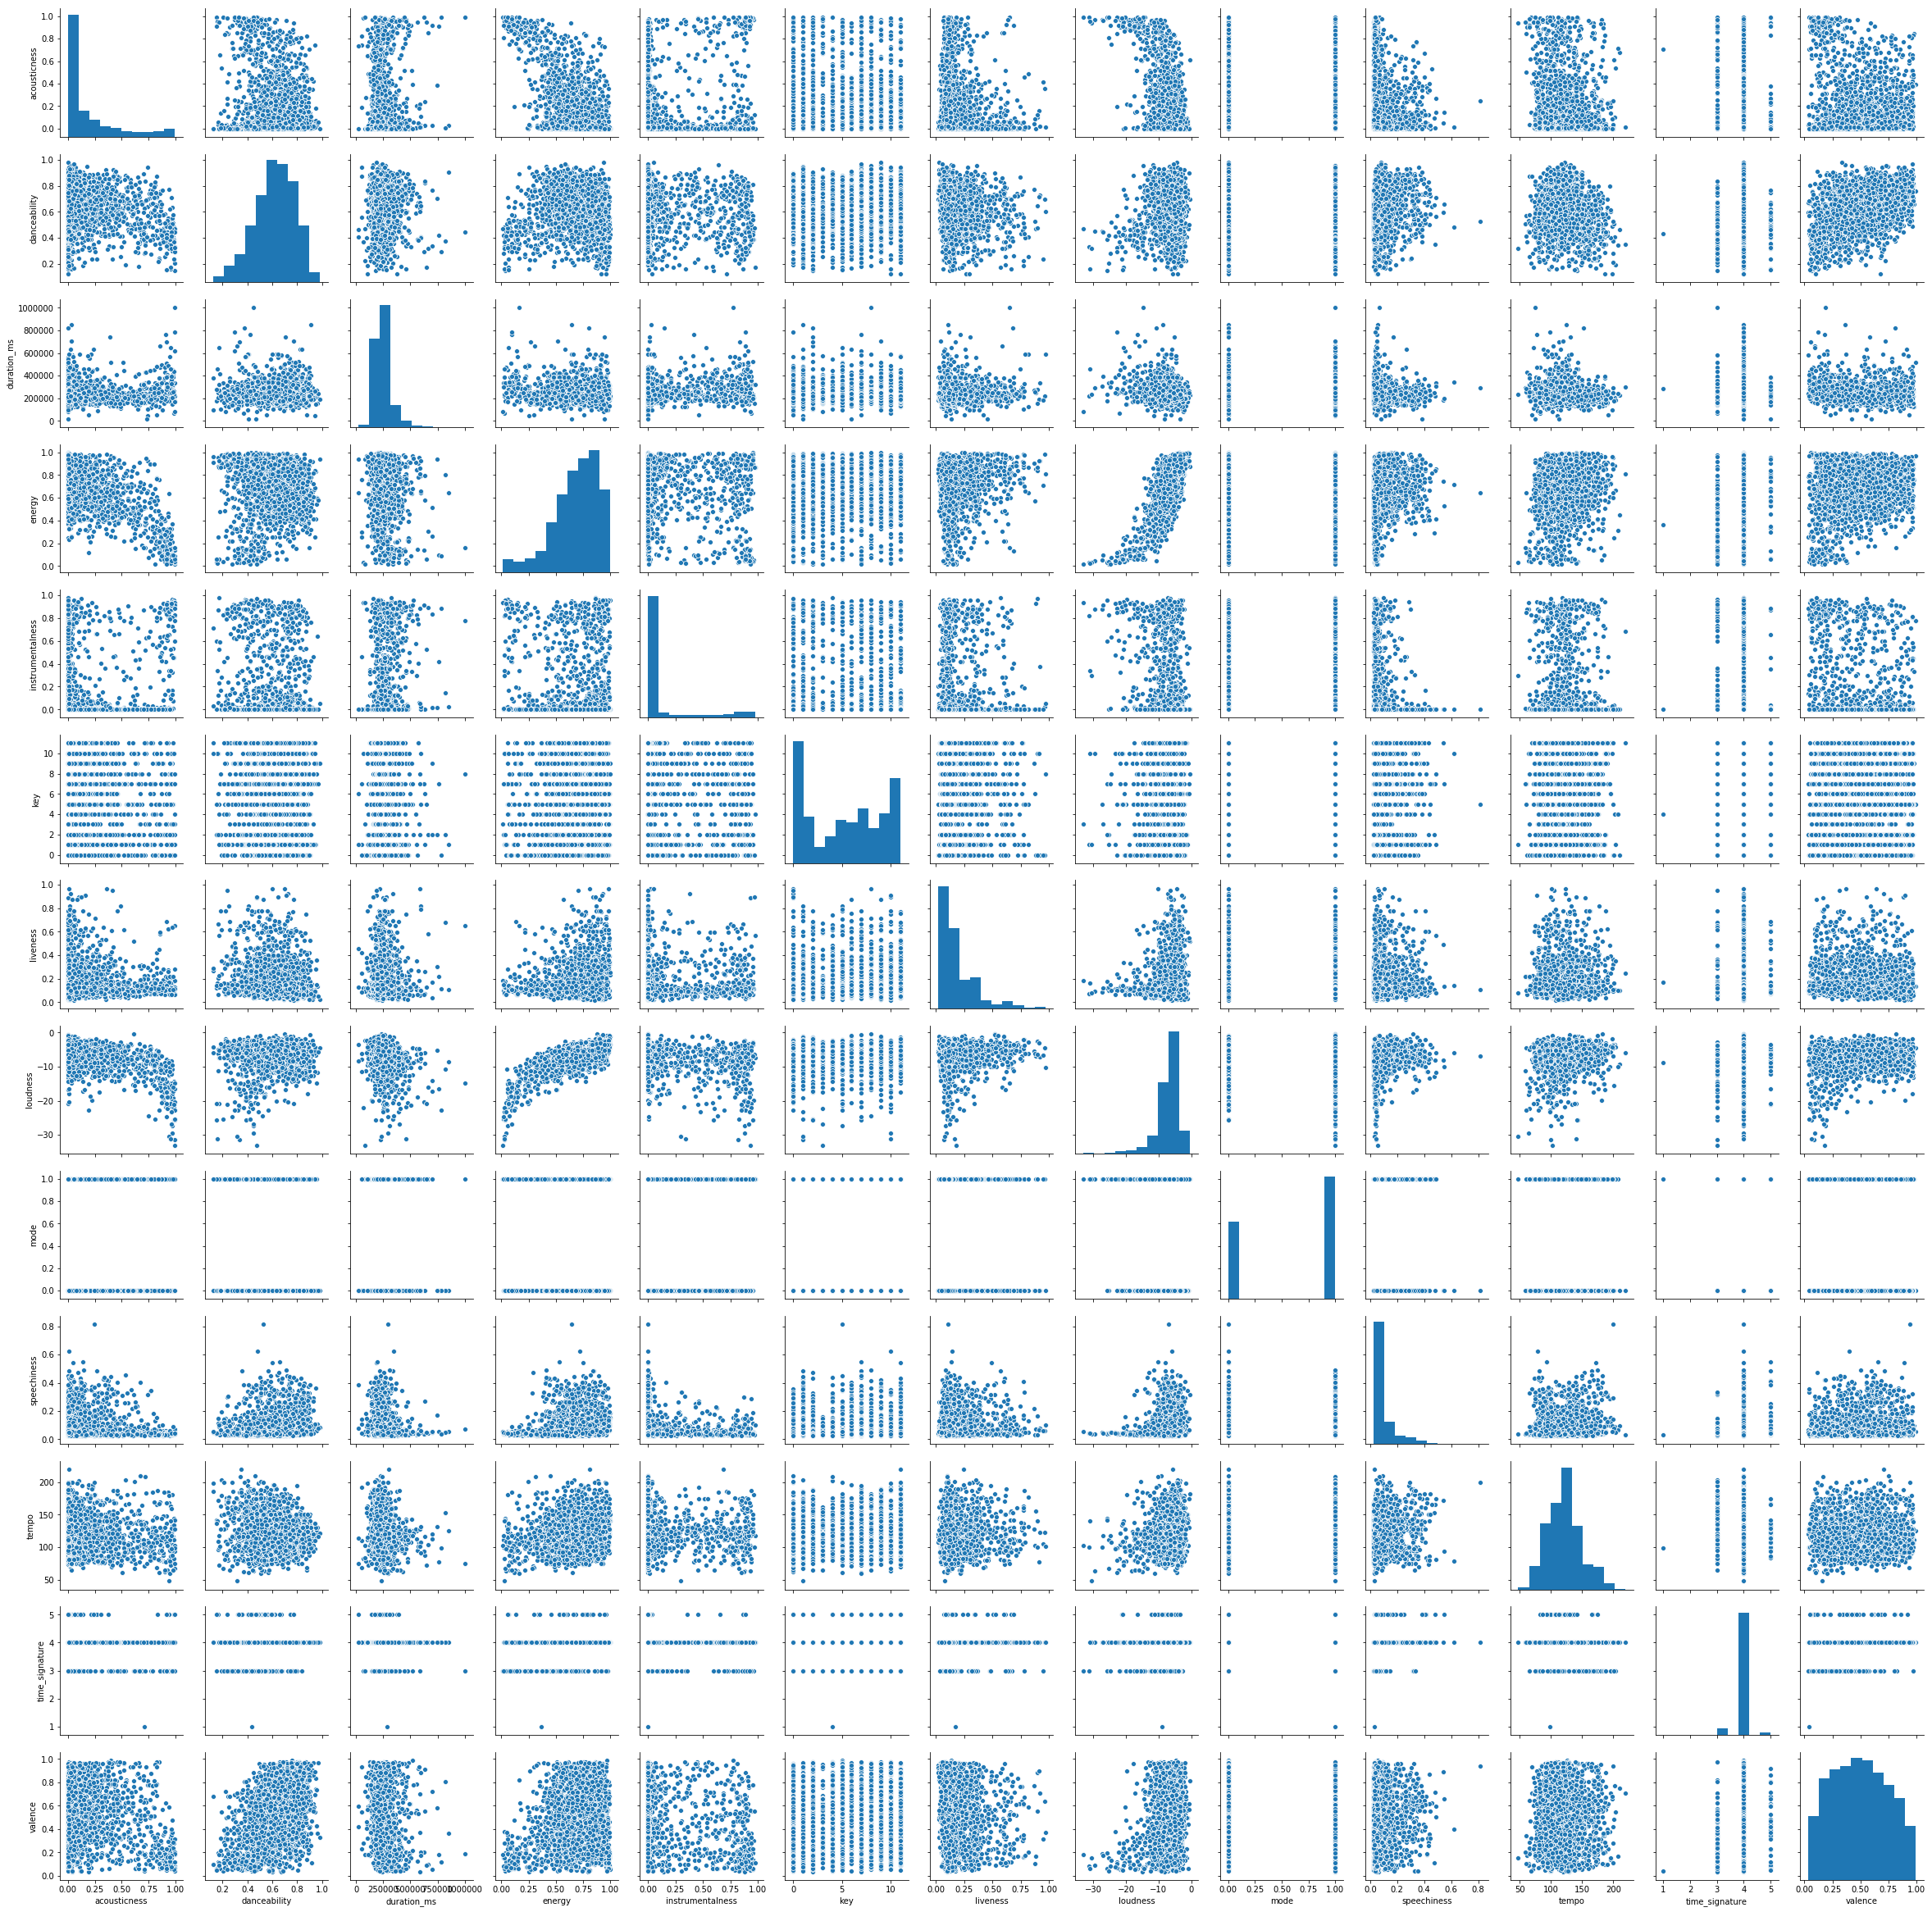

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

spotify_pd_df=spotify_df.toPandas()

#Just wanted to see the distribution of the variables:
sns.pairplot(spotify_pd_df)

In [4]:
spotify_pd_df.head()

,song_title,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,"""Beauty and the Beast - From """"Beauty and the ...",Ariana Grande,0.15200,0.494,227928,0.542,0.000000,6,0.1010,-6.995,1,0.0277,81.340,4.0,0.246
1,"""Bizarre Love Triangle - Shep Pettibone 12"""" R...",New Order,0.00428,0.704,405560,0.895,0.280000,10,0.2670,-7.810,1,0.0647,118.662,4.0,0.865
2,"""Flashlight (Sweet Life Mix) - From """"Pitch Pe...",Hailee Steinfeld,0.29900,0.510,178320,0.602,0.000000,3,0.1260,-6.317,1,0.0616,148.077,4.0,0.305
3,"""I See the Light - From """"Tangled""""/Soundtrack...",Mandy Moore,0.84500,0.240,224240,0.160,0.000000,5,0.0842,-14.213,1,0.0301,92.742,4.0,0.199
4,"""I'll Be Good - 12"""" Mix""",Rene & Angela,0.06020,0.803,446307,0.579,0.000627,10,0.2260,-11.156,0,0.0590,108.567,4.0,0.726


In [5]:
#Installing professor's package to use the 'pipe' function:
!pip install git+https://github.com/daniel-acuna/pyspark_pipes.git

  Cloning https://github.com/daniel-acuna/pyspark_pipes.git to /tmp/pip-req-build-_aifjk7q
  Running setup.py bdist_wheel for pyspark-pipes ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-pcv0kqxy/wheels/58/e0/91/9f974ba72a9ea731a32cba0cccc17064e7d959a8f37e00263f
Successfully built pyspark-pipes


In [29]:
# create the pipe_pca PipelineModel below (10 pts)
# YOUR CODE HERE

#print(type(spotify_df))

#Importing professor's package for pipelines:
from pyspark_pipes import pipe

pipe_pca=pipe(feature.VectorAssembler(inputCols=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]),
              feature.StandardScaler(withMean=True,withStd=True),feature.PCA(k=2,outputCol="pc")).fit(spotify_df)

spotify_pc_df=pipe_pca.transform(spotify_df)
spotify_pc_df=spotify_pc_df.select(fn.col("acousticness"),fn.col("danceability"),fn.col("duration_ms"),fn.col("energy"),fn.col("instrumentalness"),fn.col("key"),fn.col("liveness"),fn.col("loudness")
                                  ,fn.col("mode"),fn.col("speechiness"),fn.col("tempo"),fn.col("time_signature"),fn.col("valence"),fn.col("pc"))

spotify_pc_df.toPandas().head()

#raise NotImplementedError()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,pc
0,0.15200,0.494,227928,0.542,0.000000,6,0.1010,-6.995,1,0.0277,81.340,4.0,0.246,"[-0.8685751996998097, 0.043301712026423245]"
1,0.00428,0.704,405560,0.895,0.280000,10,0.2670,-7.810,1,0.0647,118.662,4.0,0.865,"[0.7371335527042946, 0.2222562663521943]"
2,0.29900,0.510,178320,0.602,0.000000,3,0.1260,-6.317,1,0.0616,148.077,4.0,0.305,"[-0.3714796389780159, -0.5417023468249205]"
3,0.84500,0.240,224240,0.160,0.000000,5,0.0842,-14.213,1,0.0301,92.742,4.0,0.199,"[-4.209028789729425, 0.01938727254912065]"
4,0.06020,0.803,446307,0.579,0.000627,10,0.2260,-11.156,0,0.0590,108.567,4.0,0.726,"[-0.38385925318493463, 1.0867218044471376]"


In [7]:
#Looking at the distributions from the plot above: 
#Column 1: Quantizer
#Column 2: Max Absolute Scaling
#Column 3: Max Absolute Scaling
#Column 4: Max Absolute Scaling
#Column 5: Quantizer
#Column 6: No need of scaling (Dummy)
#Column 7: Quantizer
#Column 8: Max Absolute Scaling
#Column 9: No need of scaling (Dummy)
#Column 10: Quantizer
#Column 11: Max Absolute Scaling
#Column 12: No need of scaling (Dummy)
#Column 13: Max Absolute Scaling

#My original attempt at scaling every column individually didn't workas the function needs vector as an input, so I am 
#planning to use vector assembler to group columns needing MaxAbsScaler together and Quantizer together and then scale
#them. ***update***: This won't work as the problem states that we have to take the columns in a certain order and that
#we need to standardize them (which I assume is the normalization).

'''
vec_assembler_qt=feature.VectorAssembler(inputCols=["acousticness","instrumentalness"],outputCol="qt_features")
vec_assembler_mas=feature.VectorAssembler(inputCols=[],outpuCol="mas_features")

qtz_col1=feature.QuantileDiscretizer(numBuckets=4,inputCol="acousticness",outputCol="qt_acousticness").fit(spotify_df)
qtz_col1.transform(spotify_df)

mabs_col2=feature.MaxAbsScaler(inputCol="danceability",outputCol="scl_danceability").fit(spotify_df)
mabs_col2.transform(spotify_df)

spotify_df.show(5)

mabs_col3=feature.MaxAbsScaler(inputCol="duration_ms",outputCol="scl_duration_ms")
mabs_col4=feature.MaxAbsScaler(inputCol="energy",outputCol="scl_energy")

qtz_col5=feature.QuantileDiscretizer(numBuckets=4,inputCol="instrumentalness",outputCol="qt_instrumentalness")
qtz_col7=feature.QuantileDiscretizer(numBuckets=4,inputCol="liveness",outputCol="qt_liveness")

mabs_col8=feature.MaxAbsScaler(inputCol="loudness",outputCol="scl_loudness")

qtz_col10=feature.QuantileDiscretizer(numBuckets=4,inputCol="speechiness",outputCol="qt_speechiness")
mabs_col11=feature.MaxAbsScaler(inputCol="tempo",outputCol="scl_tempo")
mabs_col13=feature.MaxAbsScaler(inputCol="valence",outputCol="scl_valence")

#spotify_df1=qtz_col1.transform(spotify_df)
#spotify_df1.toPandas().head()
vec_assembler=feature.VectorAssembler(inputCols=["qt_acousticness","scl_danceability","scl_duration_ms","scl_energy","qt_instrumentalness","key", "qt_liveness","scl_loudness","mode","qt_speechiness","scl_tempo","time_signature","scl_valence"],outputCol="scaled_features")

pca_estimator=feature.PCA(k=2,inputCol="scaled_features",outputCol="pc")

my_pipeline=Pipeline(stages=[qtz_col1,mabs_col2,mabs_col3,mabs_col4,qtz_col5,qtz_col7,mabs_col8,qtz_col10,mabs_col11,mabs_col13,vec_assembler,pca_estimator])
my_pipeline_model=my_pipeline.fit(spotify_df)

spotify_pc_df=spotify_df

my_pipeline_model.transform(spotify_pc_df)

spotify_pc_df.show(5)
'''

'\nvec_assembler_qt=feature.VectorAssembler(inputCols=["acousticness","instrumentalness"],outputCol="qt_features")\nvec_assembler_mas=feature.VectorAssembler(inputCols=[],outpuCol="mas_features")\n\nqtz_col1=feature.QuantileDiscretizer(numBuckets=4,inputCol="acousticness",outputCol="qt_acousticness").fit(spotify_df)\nqtz_col1.transform(spotify_df)\n\nmabs_col2=feature.MaxAbsScaler(inputCol="danceability",outputCol="scl_danceability").fit(spotify_df)\nmabs_col2.transform(spotify_df)\n\nspotify_df.show(5)\n\nmabs_col3=feature.MaxAbsScaler(inputCol="duration_ms",outputCol="scl_duration_ms")\nmabs_col4=feature.MaxAbsScaler(inputCol="energy",outputCol="scl_energy")\n\nqtz_col5=feature.QuantileDiscretizer(numBuckets=4,inputCol="instrumentalness",outputCol="qt_instrumentalness")\nqtz_col7=feature.QuantileDiscretizer(numBuckets=4,inputCol="liveness",outputCol="qt_liveness")\n\nmabs_col8=feature.MaxAbsScaler(inputCol="loudness",outputCol="scl_loudness")\n\nqtz_col10=feature.QuantileDiscretizer(

In [8]:
# Tests for (10 pts)
np.testing.assert_equal(type(pipe_pca),  pipeline.PipelineModel)
np.testing.assert_equal(set(spotify_pc_df.columns), {'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence', 'pc'})
np.testing.assert_equal(spotify_pc_df.first().pc.shape, (2, ))

# Question 2: (10 pts)

Create a scatter plot with the x axis containing the first principal component and the y axis containing the second principal component of `ds_features_df`

**I wasn't sure what kind of plot was expected; whether the Principal Component 1 and 2's values for every song or the loadings corresponding to Principal Components 1 & 2 for every explanatory variable (since ds_features_df is a dataframe that is nowhere in the whole notebook), I chose to plot both so that the expected one can be graded.**

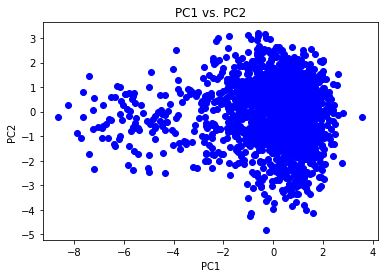

In [34]:
# below perform the appropriate 
# YOUR CODE HERE

#Scatter plot for principal compononent 1 &2 values for all songs:

#Making a dataframe (ds_features_df, one mentioned) with PC1 and PC2 columns:
PC=list(spotify_pc_df.toPandas()["pc"])
PC1=[x[0] for x in PC]
PC2=[x[1] for x in PC]
ds_features_df=pd.DataFrame({"PC1":PC1,"PC2":PC2})

#ds_features_df.head()

#Plotting the scatter plot
plt.figure()
plt.scatter(ds_features_df.PC1,ds_features_df.PC2,c="blue")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs. PC2")
display()

#raise NotImplementedError()

In [35]:
ds_features_df.head()

,PC1,PC2
0,-0.868575,0.043302
1,0.737134,0.222256
2,-0.371480,-0.541702
3,-4.209029,0.019387
4,-0.383859,1.086722


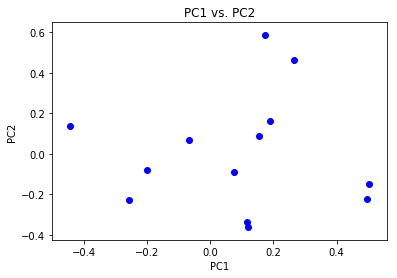

In [36]:
#Scatter Plot for loadings from Principal Component 1 & 2 for every explanatory variable:

PC1=list(pipe_pca.stages[-1].pc.toArray()[:,0])
PC2=list(pipe_pca.stages[-1].pc.toArray()[:,1])

plt.figure()
plt.scatter(PC1,PC2,c="blue")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 vs. PC2")
display()

# Question 3 (10 pts)

Create two Pandas dataframes `pc1_pd` and `pc2_pd` with the columns `feature` and `abs_loading` that contain the top 3 features in absolute loading for the principal components 1 and 2, respetively.

In [37]:
# YOUR CODE HERE
#Creating dataframes pc1_pd and pc2_pd for both the principal components:

PC1=list(abs(pipe_pca.stages[-1].pc.toArray()[:,0]))
PC2=list(abs(pipe_pca.stages[-1].pc.toArray()[:,1]))
features=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]

pc1_pd=pd.DataFrame({"feature":features,"abs_loading":PC1}).sort_values(by="abs_loading",ascending=False).head(3)
pc2_pd=pd.DataFrame({"feature":features,"abs_loading":PC2}).sort_values(by="abs_loading",ascending=False).head(3)

#raise NotImplementedError()

In [38]:
pc1_pd

,feature,abs_loading
7,loudness,0.503430
3,energy,0.496684
0,acousticness,0.442305


In [39]:
pc2_pd

,feature,abs_loading
1,danceability,0.586402
12,valence,0.465056
6,liveness,0.362308


In [40]:
# (10 pts)
assert type(pc1_pd) == pd.core.frame.DataFrame
assert type(pc2_pd) == pd.core.frame.DataFrame
np.testing.assert_array_equal(pc1_pd.shape, (3, 2))
np.testing.assert_array_equal(pc2_pd.shape, (3, 2))
np.testing.assert_equal(set(pc1_pd.columns), {'abs_loading', 'feature'})
np.testing.assert_equal(set(pc2_pd.columns), {'abs_loading', 'feature'})

# Question 4: (10 pts)

Similar to question 1, create a new pipeline for PCA called `pipe_pca2` where you fit 10 principal components instead of the 3 above. Extract the `PCAModel` from the stages of this pipeline, and assign to a variable `explainedVariance` the variance explained by components of such model. Finally, assign to a variable `best_k` the value $k$ such that the ($k+1$)-th component explains less than 0.01 variance. You can use a for-loop to find such best k.

In [52]:
# YOUR CODE HERE

#My interpretation for this: best_k is the ideal or least number of principal components we can have while explaining more than 99% of the variance in the data.
#So what I will be doing is check the explained variance array and compare the variance for every principal component (kth index PC) with 0.01 (1%) and the index where 
#my code finds variance explained to be less than 1% or 0.01, the loop will break off after assigning best_k to k+1 (since the index for explainedVariance starts at 0
#, the idea number of PCs explaining 99% variance will be k+1. eg., if the first 2 PCs (index 0 and 1) were to explain 99% of variance, best_k=(k=1)+1=2) 
#I took the default value for best_k as lenght of explainedVariance, thus I start with saying all the PCs should be added, until my loop figures the actual number of PCs
#to explain 99% variance. In case all the PCs explain more than 0.01 or 1% variance then my code will give all PCs as required PC numbers.

pipe_pca2=pipe(feature.VectorAssembler(inputCols=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"]),
              feature.StandardScaler(withMean=True,withStd=True),feature.PCA(k=10,outputCol="pc")).fit(spotify_df)

PCAModel=pipe_pca2.stages[-1]

explainedVariance=PCAModel.explainedVariance

best_k=len(explainedVariance)

k=0
while k<len(explainedVariance):
    if explainedVariance[k]<0.01:
        best_k=k+1
    k=k+1

print(explainedVariance)
print("best_k:",best_k)

#raise NotImplementedError()

[0.21912058535386628,0.11762311600501052,0.10101398991786503,0.08659107690849413,0.07925473132947829,0.07455150710583205,0.06895854862952501,0.06116443254427687,0.05765162145129577,0.05043300127594832]
best_k: 10


In [42]:
# Tests (10 pts)
np.testing.assert_equal(type(pipe_pca2.stages[-1]),  feature.PCAModel)
np.testing.assert_equal(len(explainedVariance), 10)

# Question 5 (10 pts)

Perform k-means on the features (not standardized) of the Spotify dataset with k = 5. Do this by creating a fitted pipeline `pipe_kmeans` that produces a column `cluster` with the cluster membership number of a song. Create a second fitted pipeline `pipe_analysis` that combines both `pipe_pca` and `pipe_kmeans` and fit it to the data. Finally, create a dataframe `spotify_features_df` that contains as columns the principal components `pc` and the cluster membership `cluster`. **Note**: Make sure to not create naming conflicts between the standardized features created by `pipe_pca` and the non-standardized features created by `pipe_kmeans`.

In [43]:
# YOUR CODE HERE

va=feature.VectorAssembler(inputCols=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"],outputCol="k_features")
kmeans=clustering.KMeans(k=5,featuresCol="k_features",predictionCol="cluster")

pipe_kmeans=Pipeline(stages=[va,kmeans]).fit(spotify_df)

#pipe_kmeans.transform(spotify_df).toPandas().head()

pipe_analysis=Pipeline(stages=[pipe_pca,pipe_kmeans]).fit(spotify_df)
spotify_features=pipe_analysis.transform(spotify_df).select(fn.col("pc"),fn.col("cluster"))
spotify_features.toPandas().head()

#raise NotImplementedError()

,pc,cluster
0,"[-0.8685751996998097, 0.043301712026423245]",4
1,"[0.7371335527042946, 0.2222562663521943]",1
2,"[-0.3714796389780159, -0.5417023468249205]",3
3,"[-4.209028789729425, 0.01938727254912065]",4
4,"[-0.38385925318493463, 1.0867218044471376]",1


In [44]:
# Tests for (10 pts)
np.testing.assert_equal(type(pipe_kmeans),  pipeline.PipelineModel)
np.testing.assert_equal(type(pipe_analysis),  pipeline.PipelineModel)
np.testing.assert_equal(set(spotify_features.columns), {'pc', 'cluster'})
np.testing.assert_equal(spotify_features.first().pc.shape, (2, ))
np.testing.assert_equal(type(spotify_features.first().cluster), int)
### BEGIN HDIDEN TESTS
np.testing.assert_array_equal(len(pipe_kmeans.stages), 2)

**10 pts**: Below, create a plot with the x axis being the first principal component and y-axis being the second principal component, using `spotify_features`. Set the color of each song with the cluster number.

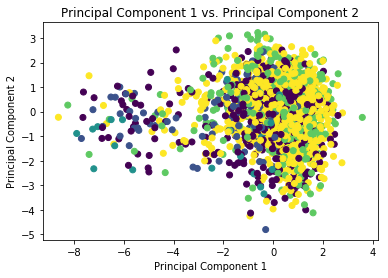

In [51]:
# YOUR CODE HERE

#import seaborn as sns

spotify_features_df=spotify_features.toPandas()
PC=list(spotify_features_df["pc"])
pc1=[x[0] for x in PC]
pc2=[x[1] for x in PC]

df=pd.DataFrame({"pc1":pc1,"pc2":pc2}).reset_index()

df["cluster"]=9
i=0
while i<len(df):
    df.loc[i,"cluster"]=spotify_features_df.loc[i,"cluster"]
    i=i+1

plt.figure()
scatter=plt.scatter(df["pc1"],df["pc2"],c=df["cluster"])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Principal Component 1 vs. Principal Component 2")
display()

#sns.pairplot(x_vars=["pc"],y_vars=["cluster"],data=spotify_features_df,hue="cluster")

#raise NotImplementedError()